In [4]:
from google.colab import files
uploaded = files.upload()

Saving account_activity.csv to account_activity.csv


In [5]:
import pandas as pd

# Assuming 'account_activity.csv' is a CSV file
df = pd.read_csv('account_activity.csv')

# Print the first few rows of the DataFrame
print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05


In [6]:
import pandas as pd
import numpy as np


df = pd.read_csv('account_activity.csv')

# Create a synthetic 'Class' column
np.random.seed(42)  # For reproducibility
df['Class'] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])  # Use 'df' instead of 'data'

# Display the first few rows with the new 'Class' column
df.head()

,CustomerID,AccountBalance,LastLogin,Class
0,1001,9507.272060,2022-01-01,0
1,1002,7408.704536,2022-01-02,1
2,1003,1715.321989,2022-01-03,0
3,1004,3101.509134,2022-01-04,0
4,1005,5405.766914,2022-01-05,0


In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('account_activity.csv')

# Create a synthetic 'Class' column
np.random.seed(42)  # For reproducibility
df['Class'] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])  # Use 'df' instead of 'data'

# Check for missing values
df.isnull().sum() # Use 'df' instead of 'data'

# Fill missing values or drop rows/columns with missing values as needed
df = df.dropna()  # Example: dropping rows with missing values, use 'df' instead of 'data'


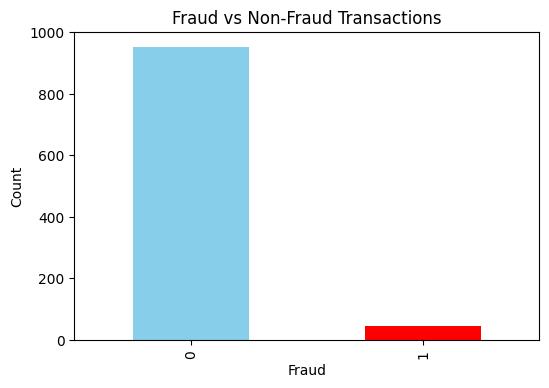

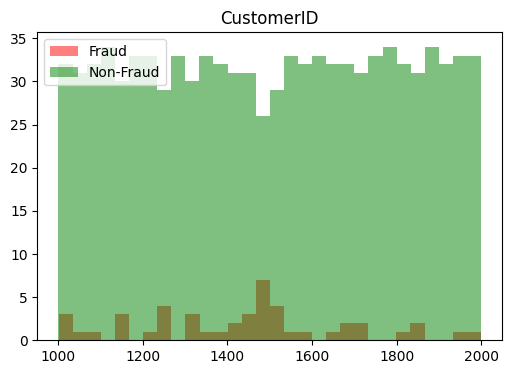

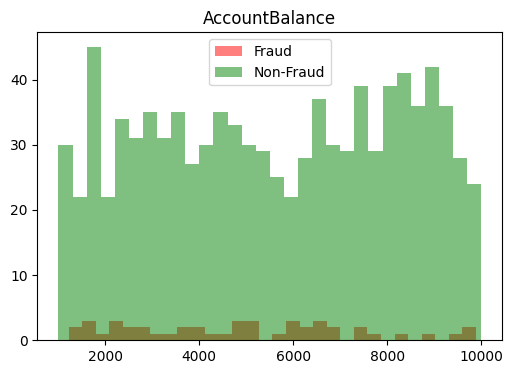

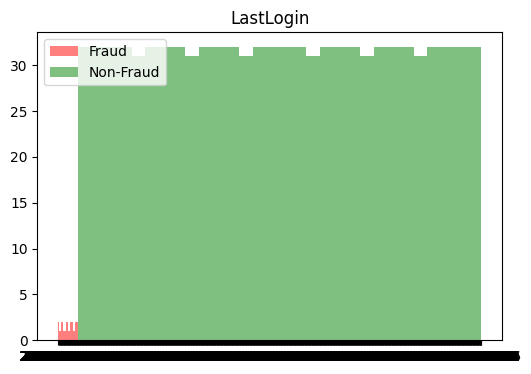

In [19]:
import matplotlib.pyplot as plt

# Visualize distribution of fraud vs. non-fraud transactions
plt.figure(figsize=(6,4))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'red']) # Use 'df' instead of 'data'
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

# Visualizing feature distributions for fraud and non-fraud transactions
for column in df.columns[:-1]:  # Exclude 'Class' column, use 'df'
    plt.figure(figsize=(6,4))
    plt.hist(df[df['Class'] == 1][column], bins=30, alpha=0.5, label='Fraud', color='red') # Use 'df' and 'Class'
    plt.hist(df[df['Class'] == 0][column], bins=30, alpha=0.5, label='Non-Fraud', color='green') # Use 'df' and 'Class'
    plt.title(column)
    plt.legend()
    plt.show()

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Spliting the data into training, validation, and test sets
# Using 'df' instead of 'data'
train, temp = train_test_split(df, test_size=0.4, random_state=42)
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

# Separate features and target variable
# Using 'Class' instead of 'fraud' as the target variable
X_train = train.drop(columns=['Class'])
y_train = train['Class'].values
X_valid = valid.drop(columns=['Class'])
y_valid = valid['Class'].values
X_test = test.drop(columns=['Class'])
y_test = test['Class'].values

# Identifying non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

# Converting date columns to numerical features
for col in non_numeric_cols:
    if X_train[col].dtype == 'object' and X_train[col].str.match(r'\d{4}-\d{2}-\d{2}').any():  # Check for date format
        X_train[col] = pd.to_datetime(X_train[col]).astype(int) / 10**9  # Convert to Unix timestamp
        X_valid[col] = pd.to_datetime(X_valid[col]).astype(int) / 10**9
        X_test[col] = pd.to_datetime(X_test[col]).astype(int) / 10**9

# Converting DataFrames to NumPy arrays after preprocessing
X_train = X_train.values
X_valid = X_valid.values
X_test = X_test.values

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier # Import KNN
from sklearn.linear_model import LogisticRegression # Import Logistic Regression


# Train a KNN model and make predictions
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_valid) # Create knn_predictions

# Train a Logistic Regression model and make predictions
logreg_model = LogisticRegression() # Initialize the model
logreg_model.fit(X_train, y_train) # Train the model
logreg_predictions = logreg_model.predict(X_valid) # Generate predictions

# Suppress the warning by setting zero_division=0
print("KNN Results:")
print(classification_report(y_valid, knn_predictions, zero_division=0))

print("\nLogistic Regression Results:")
print(classification_report(y_valid, logreg_predictions, zero_division=0)) # Now logreg_predictions is defined

KNN Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       194
           1       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       194
           1       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200



In [22]:
from imblearn.over_sampling import RandomOverSampler
import joblib  # Importing joblib for saving

# Oversampling the minority class
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Training models on resampled data
knn = KNeighborsClassifier().fit(X_train_resampled, y_train_resampled)
logreg = LogisticRegression().fit(X_train_resampled, y_train_resampled)

# Saving the trained knn model
joblib.dump(knn, 'knn_model.pkl')

# Assuming i have a scaler object, save it as well
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [25]:
from imblearn.over_sampling import RandomOverSampler
import joblib  # Importing joblib for saving

# Oversampling the minority class
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Training models on resampled data
knn = KNeighborsClassifier().fit(X_train_resampled, y_train_resampled)
logreg = LogisticRegression().fit(X_train_resampled, y_train_resampled)

# Saving the trained knn model
joblib.dump(knn, 'knn_model.pkl')

# Assuming i have a scaler object, save it as well
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [26]:
from flask import Flask, request, jsonify
import joblib
import numpy as np


In [27]:
app = Flask(__name__)


In [28]:
model = joblib.load('knn_model.pkl')
scaler = joblib.load('scaler.pkl')


In [29]:
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = np.array(data['features']).reshape(1, -1)
    features = scaler.transform(features)
    prediction = model.predict(features)
    return jsonify({'prediction': int(prediction[0])})


In [30]:
import joblib

# Assuming `knn_model` is my trained model and `scaler` is my trained scaler
joblib.dump(knn_model, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [31]:
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [32]:
import requests

url = 'http://127.0.0.1:5000/predict'
data = {'features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
try:
    response = requests.post(url, json=data)
    if response.status_code == 200:
        print(response.json())
    else:
        print('Error:', response.status_code, response.text)
except requests.ConnectionError as e:
    print(f"ConnectionError: {e}")


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7c38e1d90730>: Failed to establish a new connection: [Errno 111] Connection refused'))
